In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform

In [56]:
sudoku = cv.imread('input/sudoku.jpg')
gray_sudoku = cv.cvtColor(sudoku, cv.COLOR_BGR2GRAY)

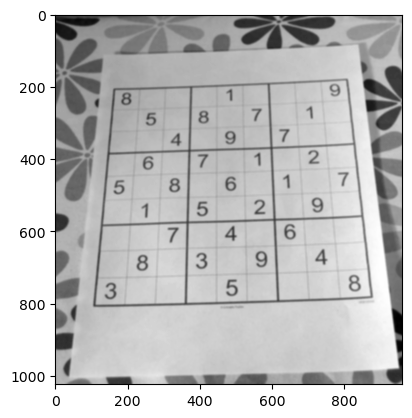

In [57]:
sudoku_blured = cv.GaussianBlur(gray_sudoku, (7, 7), 3)
plt.imshow(sudoku_blured, cmap='gray')

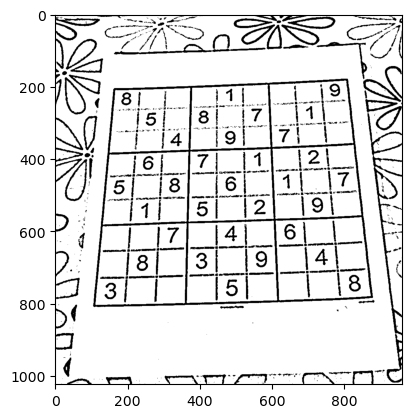

In [58]:
thresh_sudoku = cv.adaptiveThreshold(sudoku_blured, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
plt.imshow(thresh_sudoku, cmap='gray')

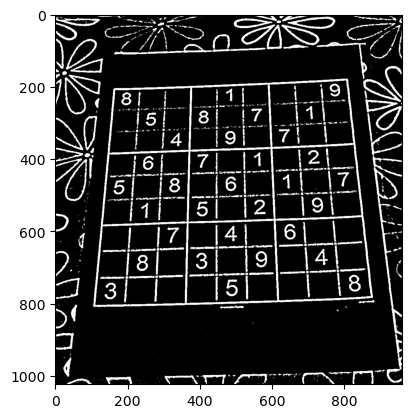

In [59]:
thresh_sudoku = cv.bitwise_not(thresh_sudoku)
plt.imshow(thresh_sudoku, cmap='gray')

In [60]:
contours = cv.findContours(thresh_sudoku, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0]

In [61]:
contours = sorted(contours, key=cv.contourArea, reverse=True)
len(contours)

377

In [62]:
sudoku_contour = None
for contour in contours:
    epsilon = 0.02 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        sudoku_contour = approx
        break

if sudoku_contour is None:
    print('Sorry, Sudoku not found!')

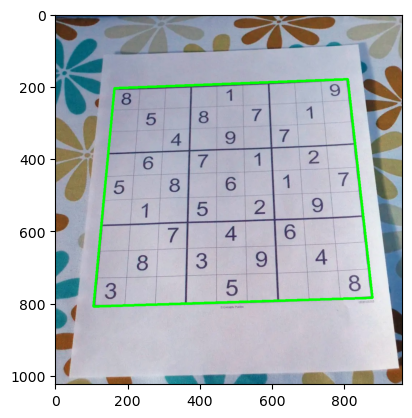

In [63]:
result = cv.drawContours(sudoku, [sudoku_contour], -1, (0, 255, 0), 5)
plt.imshow(result)

In [64]:
points = np.array(sudoku_contour, dtype=np.float32)
pts = points.squeeze()

True

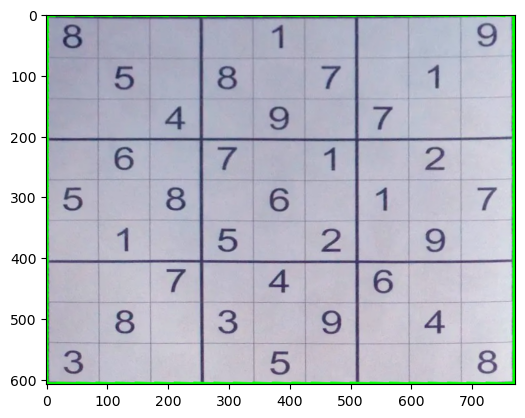

In [65]:
cropped_sudoku = four_point_transform(sudoku, pts)
plt.imshow(warped)
cv.imwrite('output/cropped-sudoku.jpg', cropped_sudoku)